# Predict the absenteeism time in hours through classification and clustering

# Load and take a look at the data

In [77]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [78]:
# Load data
ds=pd.read_csv('Absenteeism2.csv')

In [79]:
ds.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [80]:
ds.shape

(740, 21)

In [81]:
ds.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

# Check and treat null values

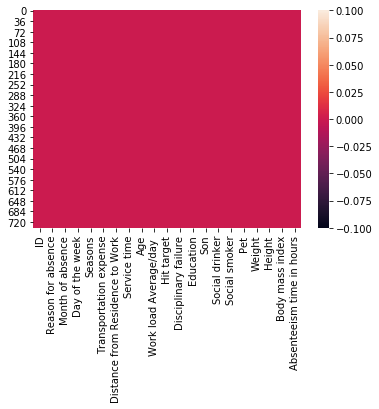

In [82]:
sns.heatmap(ds.isnull())

No null values present.

In [83]:
ds.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

# Check correlation

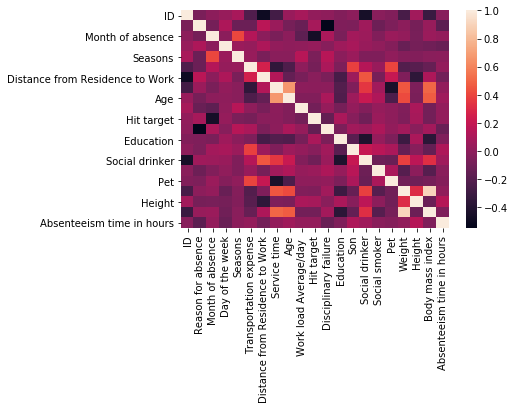

In [84]:
dscor=ds.corr()
sns.heatmap(dscor)

Columns best correlated to the target column:
    Height, Son
Next:
    Social drinker, age, transportation expense, month of absence
then:the intermediate columns
worst:
    Reason for absence,Day of the week, Distance from work,Disiplinary failure and Education

# Summary statistics

In [85]:
ds.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


No extreme outliers or large standard deviations.

# Data visualizations

In [86]:
ds.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

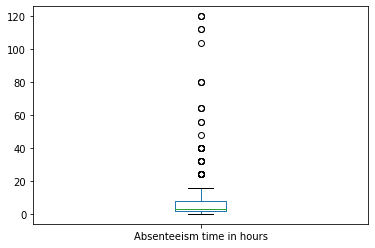

In [87]:
# Check for outliers
ds['Absenteeism time in hours'].plot.box()

Data has a wide spead but no clear outliers.

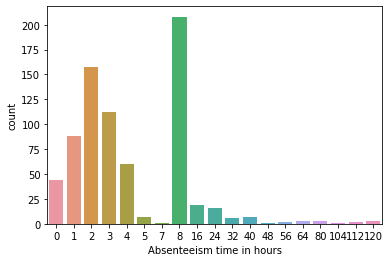

In [88]:
sns.countplot(ds['Absenteeism time in hours'])

The most common amount of hours that employees are absent is 8 hours.

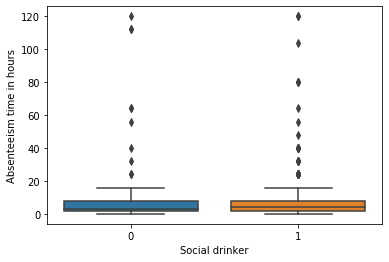

In [89]:
sns.boxplot(x='Social drinker',y='Absenteeism time in hours',data=ds)

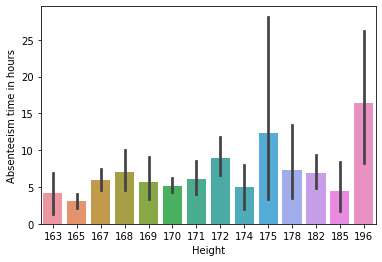

In [90]:
sns.barplot(x='Height',y='Absenteeism time in hours',data=ds)

Here it seems that taller people are more likely to be absent more often, which is a strange metric and is most likely coincidental rather than a true contributing factor.

Social drinkers are more likely to be absent.

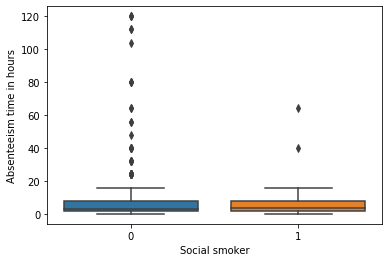

In [91]:
sns.boxplot(x='Social smoker',y='Absenteeism time in hours',data=ds)

On average social smokers are more likely to be absent, but there are more non-smoking individuals with high absentee hours.

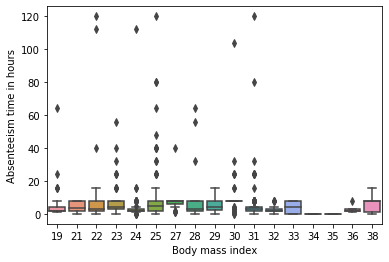

In [92]:
sns.boxplot(x='Body mass index',y='Absenteeism time in hours',data=ds)

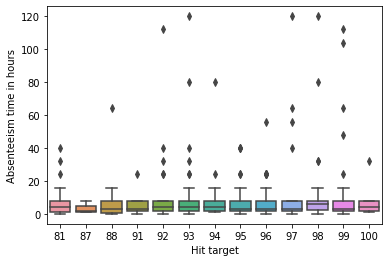

In [93]:
sns.boxplot(x='Hit target',y='Absenteeism time in hours',data=ds)

People seem to still be able to hit most of their targets even when absent.

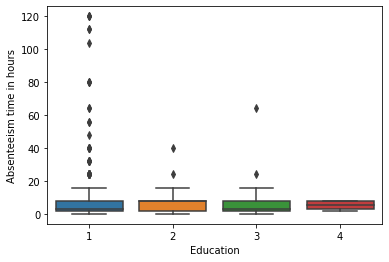

In [94]:
sns.boxplot(x='Education',y='Absenteeism time in hours',data=ds)

People with a lower level of education are more likely to be absent.

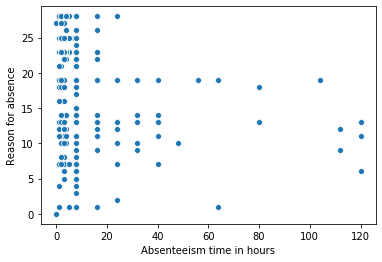

In [95]:
sns.scatterplot(x='Absenteeism time in hours', y='Reason for absence', data=ds)

No observable relationship.

# Check eveness of dataset

In [96]:
year_counts = ds['Absenteeism time in hours'].value_counts()
year_counts

8      208
2      157
3      112
1       88
4       60
0       44
16      19
24      16
40       7
5        7
32       6
64       3
80       3
120      3
112      2
56       2
48       1
7        1
104      1
Name: Absenteeism time in hours, dtype: int64

In [97]:
year_percentage = ds['Absenteeism time in hours'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
year_percentage

8      28.1%
2      21.2%
3      15.1%
1      11.9%
4       8.1%
0       5.9%
16      2.6%
24      2.2%
40      0.9%
5       0.9%
32      0.8%
64      0.4%
80      0.4%
120     0.4%
112     0.3%
56      0.3%
48      0.1%
7       0.1%
104     0.1%
Name: Absenteeism time in hours, dtype: object

The data is not distributed evenly over the target column which will affect the accuracy score of classification models.  Stratifying the target column will not work either because some of the target column entries have only one instance. Klustering will most likely give the best results.

# Drop irrelevant columns

In [98]:
ds.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

Columns best correlated to the target column:
    Height, Son
Next:
    Social drinker, age, transportation expense, month of absence
then:the intermediate columns
worst:
    Reason for absence,Day of the week, Distance from work,Disiplinary failure and Education

In [99]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=ds.drop(columns=['ID'])

# Find and remove outliers

In [100]:
nds.shape

(740, 20)

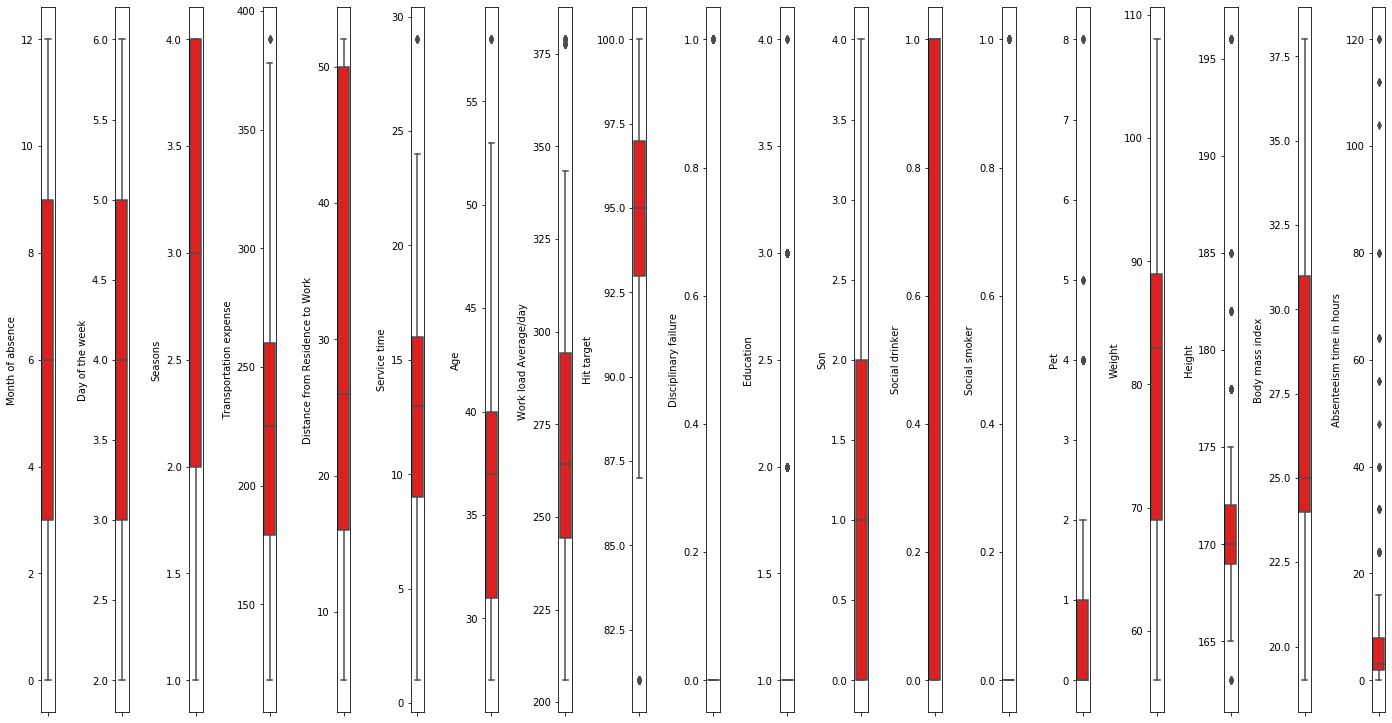

In [101]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=20
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [102]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(740, 20)
(576, 20)


# Check and adjust skewness

In [103]:
# Show skewness (less than 0.55 is ok)
cds.skew()

Reason for absence                -1.027334
Month of absence                   0.109690
Day of the week                    0.082048
Seasons                           -0.019301
Transportation expense             0.327717
Distance from Residence to Work    0.199294
Service time                      -0.153111
Age                                0.517042
Work load Average/day              1.019484
Hit target                        -0.461369
Disciplinary failure               0.000000
Education                          1.990046
Son                                1.447470
Social drinker                    -0.188822
Social smoker                      0.000000
Pet                                1.721238
Weight                            -0.128296
Height                             1.449688
Body mass index                    0.037118
Absenteeism time in hours          3.171312
dtype: float64

No adjustments made as it leads to continious values.

# Split data into x and y

In [104]:
cds.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [105]:
# Lineup target and input values
cds_x=cds.drop(columns=['Absenteeism time in hours'])
y=cds[['Absenteeism time in hours']]

# Apply scaler

In [129]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=sc.fit_transform(cds_x)
x=pd.DataFrame(x,columns=cds_x.columns)

In [154]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
sc_x = scaler.fit_transform(x)
sc_x=pd.DataFrame(sc_x,columns=x.columns)

# Train-Test split

In [155]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(sc_x,y, random_state=55, test_size=0.20)

# Model (KMeans)

In [147]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

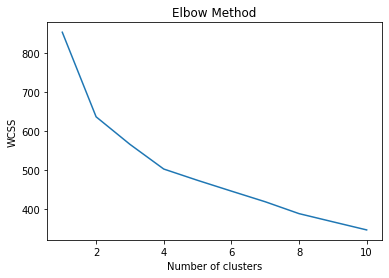

In [185]:
# Determine the amount of clusters needed with the Elbow Method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(sc_x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Choose k=4

In [188]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(sc_x)

In [189]:
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

ValueError: Found input variables with inconsistent numbers of samples: [116, 576]

# Using GridSearchCV to select the best parameter

In [156]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [157]:
# Best parameters for SVC
from sklearn.model_selection import GridSearchCV

sv=SVC()
parameters={'kernel':('poly','rbf','linear')}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'rbf'}

In [158]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [159]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 10}

# Comparing classification algorithm results

In [160]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [161]:
from sklearn.model_selection import cross_val_score

In [162]:
KNN=KNeighborsClassifier(n_neighbors= 10)
SV=SVC(kernel='rbf')# check c parameter?
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
MNB=MultinomialNB()

In [163]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('MultinomialNB',MNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')



Accuracy score = 0.4482758620689655


cross validation score = 0.3592558983666062


classification_report
               precision    recall  f1-score   support

           1       0.20      0.33      0.25         9
           2       0.47      0.64      0.55        28
           3       0.26      0.28      0.27        18
           4       0.17      0.10      0.12        10
           5       0.00      0.00      0.00         1
           8       0.66      0.60      0.62        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                    

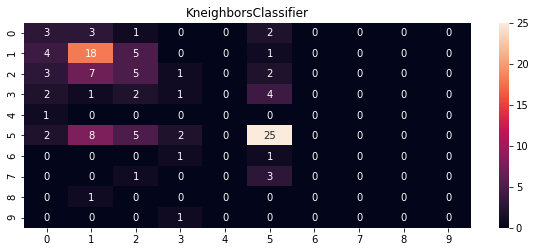

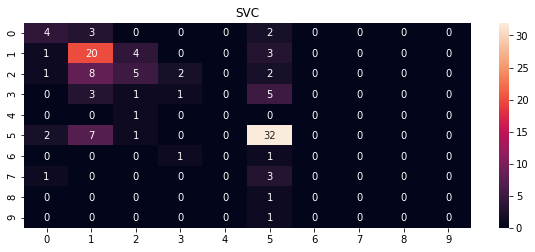

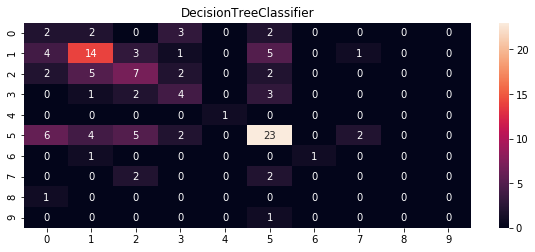

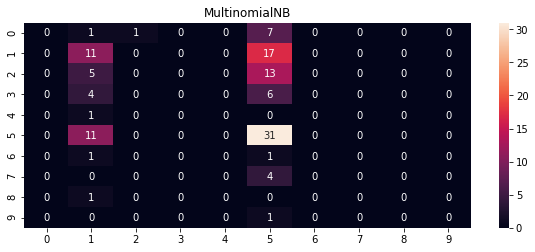

In [164]:
model_list=[]
score=[]
cvs=[]


for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,sc_x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
  
    print('\n\n')

In [165]:
# Show the results of the models above in a table
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KneighborsClassifier,44.827586,35.925590
1,SVC,53.448276,41.666667
2,DecisionTreeClassifier,44.827586,31.969147
3,MultinomialNB,36.206897,32.126437


In [166]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.5431034482758621
[[ 2  3  1  1  0  2  0  0  0  0]
 [ 3 19  3  2  0  1  0  0  0  0]
 [ 2  4  6  3  0  3  0  0  0  0]
 [ 0  1  1  3  0  5  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0]
 [ 4  1  3  0  0 32  0  2  0  0]
 [ 0  0  0  0  0  2  0  0  0  0]
 [ 0  0  2  0  0  2  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.17      0.22      0.19         9
           2       0.68      0.68      0.68        28
           3       0.38      0.33      0.35        18
           4       0.33      0.30      0.32        10
           5       1.00      1.00      1.00         1
           8       0.67      0.76      0.71        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.54       116


In [167]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.4482758620689655
[[ 0  8  0  0  0  1  0  0  0  0]
 [ 2 21  0  1  0  4  0  0  0  0]
 [ 1 15  0  0  0  2  0  0  0  0]
 [ 0  8  0  1  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0 11  0  1  0 30  0  0  0  0]
 [ 0  1  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.33      0.75      0.46        28
           3       0.00      0.00      0.00        18
           4       0.33      0.10      0.15        10
           5       0.00      0.00      0.00         1
           8       0.65      0.71      0.68        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1

    accuracy                           0.45       116


In [168]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(cds_x,y)
clf.best_params_

{'learning_rate': 0.001, 'n_estimators': 500}

In [169]:
gbr=GradientBoostingClassifier(learning_rate= 0.001, n_estimators= 500,random_state=42)
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print(accuracy_score(y_test,predgbr))
print(confusion_matrix(y_test,predgbr))
print(classification_report(y_test,predgbr))

0.5258620689655172
[[ 0  4  3  0  0  0  2  0  0  0  0]
 [ 1 23  0  0  0  0  4  0  0  0  0]
 [ 0 14  0  2  0  0  2  0  0  0  0]
 [ 0  4  0  0  0  1  5  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4  0  0  0  0 38  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         9
           2       0.47      0.82      0.60        28
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.63      0.90      0.75        42
          16       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         4
          32       0.00      0.00      0.00

I choose the RandomForestClassifiermodel

accuracy score = 54.3

precision = 17

recall = 22

# Save the model

In [183]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(rf,'Absenteeism.pkl')

['Absenteeism.pkl']

In [184]:
# Load and use model to make a prediction
model=joblib.load('Absenteeism.pkl')
model.predict(x_test)

array([24,  2,  3,  8,  8,  3,  8,  8,  2,  3,  8,  8,  8,  3,  8,  2,  2,
        2,  8,  4,  2,  8,  2,  3,  8,  8,  3,  8,  8,  1,  8,  1,  8,  1,
        2,  2,  8,  8,  1,  3,  4,  8,  8,  8,  1,  1,  3,  4,  4,  4,  2,
        8,  2,  8,  2,  1,  8,  8,  2,  8,  3,  3,  2,  8,  8,  1,  2,  1,
        3,  8,  8,  8,  2,  2,  8,  8,  3,  2,  8,  8,  8,  2,  8,  2,  2,
        4,  8,  8,  1,  2,  8,  3,  1,  3,  4,  8,  3,  8,  2,  2,  8,  2,
        8,  4,  5,  4,  1,  2, 24,  8,  8,  8,  2,  2,  8,  3],
      dtype=int64)